## 从模型目录加载模型到notebook

In [5]:
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import logging
logging.getLogger('tensorflow').disabled = True

# 下载模型
mc = ModelCatalog(compartment_id = os.environ['NB_SESSION_COMPARTMENT_OCID'])
list_of_models=mc.list_models()
path = '/home/datascience/block_storage/model_new'
mc.download_model(list_of_models[0].id,path , force_overwrite=True)
print('已下载模型:',list_of_models[0].display_name,'  到：',path)

# 加载模型
model_artifact = ModelArtifact(path)
model_artifact.reload()
model_new = model_artifact.model
print('模型信息：')
print(model_new.summary())

已下载模型: 胸透图像识别算法   到： /home/datascience/block_storage/model_new
模型信息：
Framework: keras.engine.training
Estimator class: Model
Model Parameters: None

None


## 用模型检测胸透图片是否有肺炎

罹患肺炎概率：91.2%


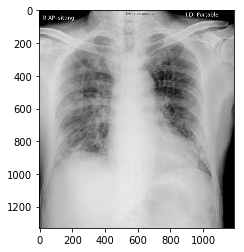

In [6]:
# 读取图片
img_dims = 150
imagePath='xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day7.jpeg'
img = cv2.imread(imagePath,0)
img = cv2.resize(img, (img_dims, img_dims))
img = np.dstack([img, img, img])
img = img.astype('float32') / 255        
test_data = np.array([img])

# 预测结果
pred = model_new.predict(test_data)[0][0]
print('罹患肺炎概率：'+ str(round(pred*100,1))+'%')
plt.imshow(plt.imread(imagePath), cmap='gray')
plt.show()